# California Housing Price Prediction – Exploratory Data Analysis & Feature Selection

###In this notebook, we will explore and analyze the California Housing Dataset, a well-known dataset used for predicting house prices based on features such as median income, house age, number of rooms, and population.

####To build a robust regression model, we must first understand the data, preprocess it, and select the most relevant features. A good model starts with good data preparation, so we will perform key steps in Exploratory Data Analysis (EDA) and Feature Selection before applying regression.

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import machine learning utilities
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
# Load the dataset from sklearn
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target variable (House Price)
df["MedHouseVal"] = housing.target


# Print dataset details
print(f" Number of Features: {df.shape[1] - 1}")  # Excluding target
print(f" Number of Data Points: {df.shape[0]}")
print(f" Number of Target Variables: 1 (MedHouseVal)")


 Number of Features: 8
 Number of Data Points: 20640
 Number of Target Variables: 1 (MedHouseVal)


In [ ]:
# Load the dataset from sklearn
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


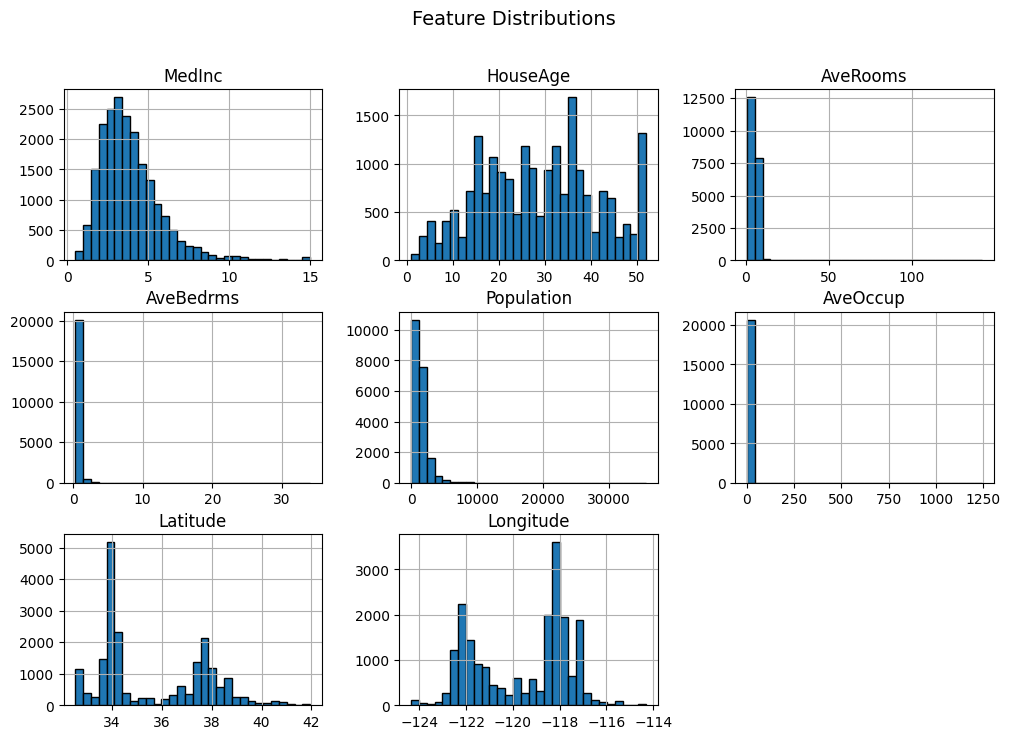

In [ ]:
# Plot histograms for all features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


##Insights from Histograms:

HouseAge → Uniformly distributed.

AveRooms & AveBedrms → Might have outliers (Check box plots later).

Population → Highly skewed, might need scaling.

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale all numerical features (excluding target variable)
scaled_features = scaler.fit_transform(df.drop(columns=["MedHouseVal"]))

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=["MedHouseVal"]).columns)




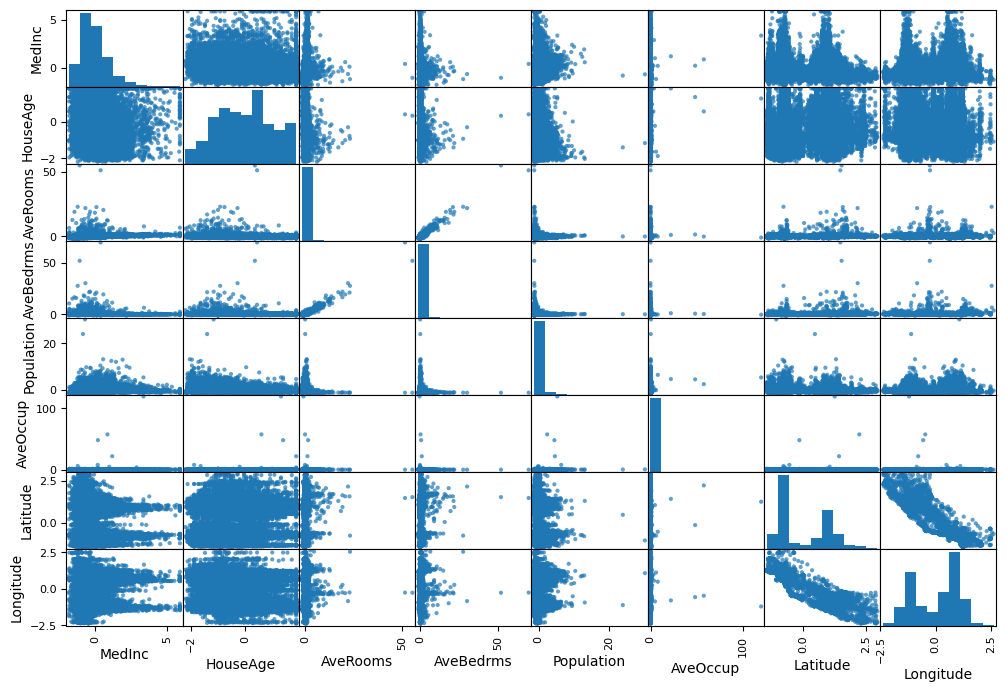

In [ ]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix (may be messy)
scatter_matrix(df_scaled, figsize=(12, 8), alpha=0.7, diagonal="hist")
plt.show()


# observation:
high positive correlation between averooms and avebedrms features so one of the features can be removed

In [ ]:

from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = df_scaled  # Use the selected scaled features
y = df["MedHouseVal"]  # Target variable (House Price)

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f" Training Set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f" Test Set: {X_test.shape[0]} samples, {X_test.shape[1]} features")

 Training Set: 16512 samples, 8 features
 Test Set: 4128 samples, 8 features


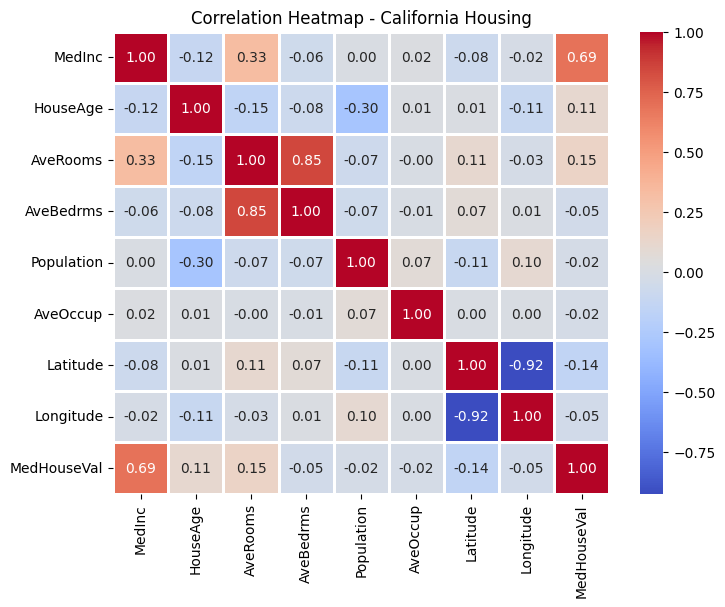

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Display correlation values with 2 decimal places
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=1)

plt.title("Correlation Heatmap - California Housing")
plt.show()


##key takeaways:
1. (Median Income) has High Positive Correlation with median house value(target variable) (0.69)

 So this is the Most important predictor of house prices.

 2. AveRooms vs AveBedrms have high multicollinearity so one of the can be removed and performance will be evaluated on the basis of this.

 3. Latitude & Longitude are naturally related (houses closer to each other have similar values). But removing both would mean losing crucial location data, which significantly impacts house prices.





In [ ]:


# Define independent (X) and dependent (y) variables
X = df_scaled  # Use the selected scaled features
y = df["MedHouseVal"]  # Target variable (House Price)

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f" Training Set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f" Test Set: {X_test.shape[0]} samples, {X_test.shape[1]} features")

 Training Set: 16512 samples, 8 features
 Test Set: 4128 samples, 8 features


In [ ]:

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(" Model Training Completed!")


 Model Training Completed!


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

# Compute regression metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print(f"Model Performance :")
print(f"🔹 Training :  MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"🔹 Testing :  MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")




Model Performance :
🔹 Training :  MSE: 0.5179, RMSE: 0.7197, MAE: 0.5286, R²: 0.6126
🔹 Testing :  MSE: 0.5559, RMSE: 0.7456, MAE: 0.5332, R²: 0.5758


# FEATURE SCALING OBSERVATIONS:

### without going in details of model training lets try to understnd the importance of scaling and how it impacts feature importnce after model training and try to gain some insights

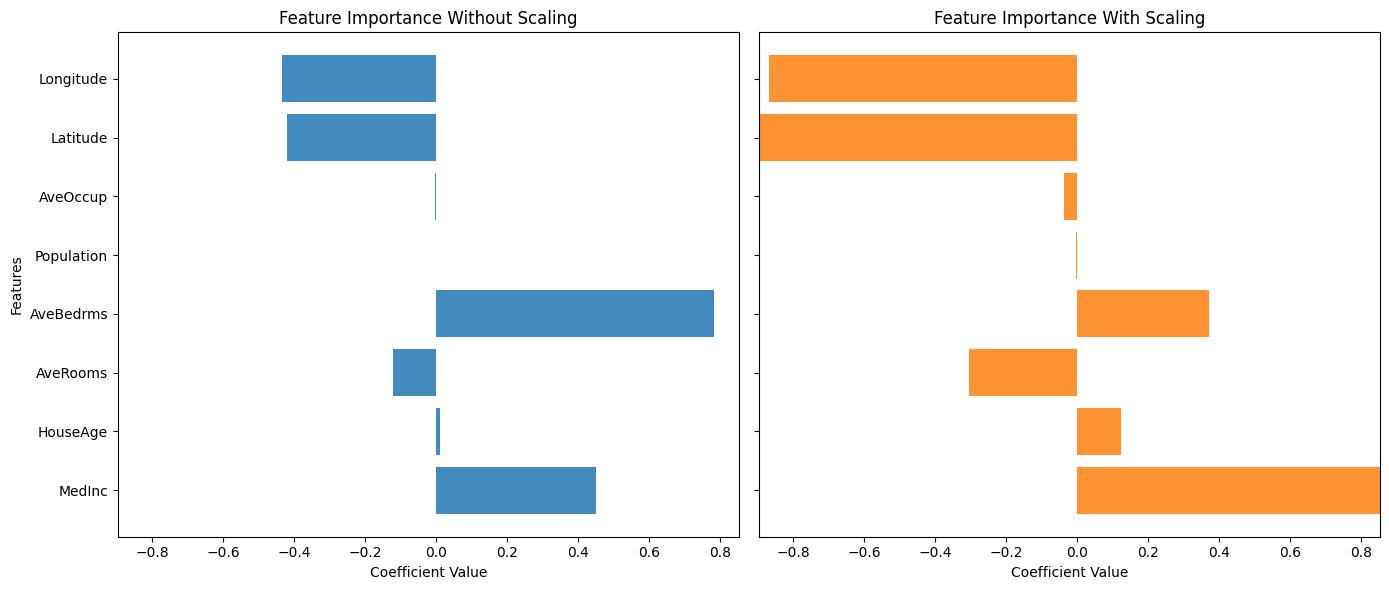

In [ ]:



# Define X and y
X_unscaled = df.drop(columns=["MedHouseVal"])  # Features (without scaling)
y = df["MedHouseVal"]  # Target variable

# Split data
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X_unscaled, y, test_size=0.2, random_state=42
)

# **Train Model Without Scaling**
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled, y_train)

# Get feature importance (coefficients)
feature_importance_unscaled = model_unscaled.coef_

# **2 Train Model With Scaling**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)  # Scale **only features**

# Split data again for the scaled model
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
feature_importance_scaled = model_scaled.coef_




# Define new distinct colors for clear interpretation
color_unscaled = "#1f77b4"  # Strong Blue
color_scaled = "#ff7f0e"  # Strong Orange

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot Feature Importance Before Scaling
axes[0].barh(features, feature_importance_unscaled, color=color_unscaled, alpha=0.85)
axes[0].set_title("Feature Importance Without Scaling")
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Features")

# Plot Feature Importance After Scaling
axes[1].barh(features, feature_importance_scaled, color=color_scaled, alpha=0.85)
axes[1].set_title("Feature Importance With Scaling")
axes[1].set_xlabel("Coefficient Value")

# Ensure same x-scale for both plots for fair comparison
plt.xlim(min(np.min(feature_importance_unscaled), np.min(feature_importance_scaled)),
         max(np.max(feature_importance_unscaled), np.max(feature_importance_scaled)))

# Display the plots
plt.tight_layout()
plt.show()

### Without Scaling (Left Plot - Blue)

1. Features with large numerical ranges (e.g., AveBedrms, MedInc) have higher coefficient magnitudes, which may falsely indicate higher importance.

2. Some features, like AveOccup, have very small coefficients, making them seem less relevant.

### With Scaling (Right Plot - Orange)

1. Feature importance is more uniformly distributed, ensuring each feature contributes proportionally to the model.
2. Features that were previously inflated (AveBedrms) now show a more reasonable influence.
3. The model is now less biased towards large-value features, making predictions more stable.

# dropping highly collinear feature
Now lets try dropping (averoom) feature as it was highly correlated to (avebedrms) feature and evaluate model performace based on that

In [ ]:

df_scaled_dropped = df_scaled.drop(columns=["AveRooms"])

# Redefine independent (X) and dependent (y) variables
X = df_scaled_dropped  # Use the updated scaled features
y = df["MedHouseVal"]  # Target variable

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model again
model = LinearRegression()
model.fit(X_train, y_train)

# Make new predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute regression metrics (MSE, RMSE, MAE, R²)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display updated results
print(f" Model Performance After Dropping 'AveRooms':")
print(f" Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f" Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


 Model Performance After Dropping 'AveRooms':
🔹 Train MSE: 0.5289, RMSE: 0.7272, MAE: 0.5382, R²: 0.6044
🔹 Test MSE: 0.5505, RMSE: 0.7419, MAE: 0.5394, R²: 0.5799


###After dropping (averoom) feature

1.Test R² Improved → Better generalization

2.Reduction in test MSE (better generalization)


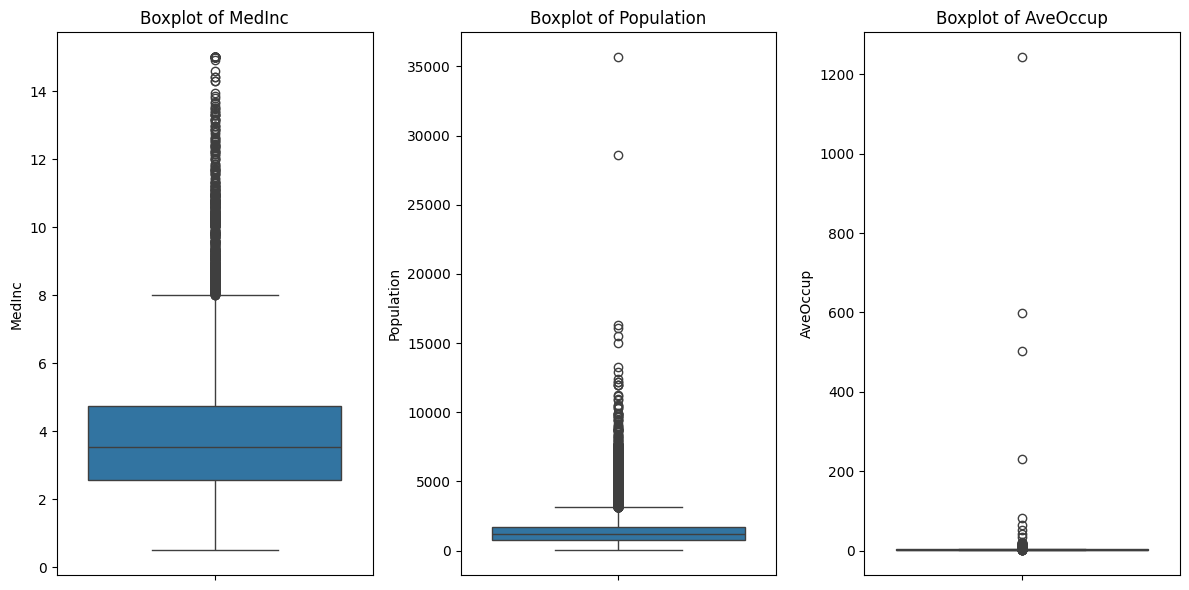

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for boxplot
features_to_check = ["MedInc", "Population", "AveOccup"]

# Create boxplots for selected features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter dataset to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply IQR-based outlier removal for the selected features
for feature in ["MedInc", "Population", "AveOccup"]:
    df = remove_outliers(df, feature)

print(f" Data shape after removing outliers: {df.shape}")


 Data shape after removing outliers: (18199, 9)


# Evaluating regression performance after outlier removal

In [ ]:

# Re-scale the data after outlier removal
scaled_features = scaler.fit_transform(df.drop(columns=["MedHouseVal"]))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=["MedHouseVal"]).columns)

# Drop 'AveRooms'
df_scaled_dropped = df_scaled.drop(columns=["AveRooms"])

# Redefine X and y
X = df_scaled_dropped
y = df["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)



train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display updated results
print(f" Model Performance After Outlier Removal:")
print(f" Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f" Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

 Model Performance After Outlier Removal:
🔹 Train MSE: 0.4419, RMSE: 0.6648, MAE: 0.4958, R²: 0.6189
🔹 Test MSE: 0.4733, RMSE: 0.6879, MAE: 0.5115, R²: 0.6120


# Key Observations:

1. MSE, RMSE, and MAE all decreased → The model is making more accurate predictions.

2. Test error reduced significantly → Better generalization (outliers were negatively impacting performance before).

3. Higher Test R² → Model now explains more variance in test data, meaning it generalizes better.

Why Did Model Performance Improve?

 1. Outliers had an extreme effect on loss (MSE & RMSE).
 2. Removing them reduced noise and stabilized predictions.

 3. Lower MSE & RMSE show that removing extreme values improved model reliability.

## There are a lot more feature analysis methods !!!

i would recommend you guys to go through them and experiment and interpret the results to gain better understnding of each method and gain more insight about when to use which tool.

example reference:
https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression